## Red Wine Quality Prediction

### Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

### Attribute Information:

Input variables (based on physicochemical tests): <br>
1 - Fixed Acidity<br>
2 - Volatile Acidity<br>
3 - Citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br>

#### Import Usefull Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
# warnings.simplefilter(action="ignore", category=FutureWarning)

### Loding the Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# check for null-values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Exploratory Data Analysis

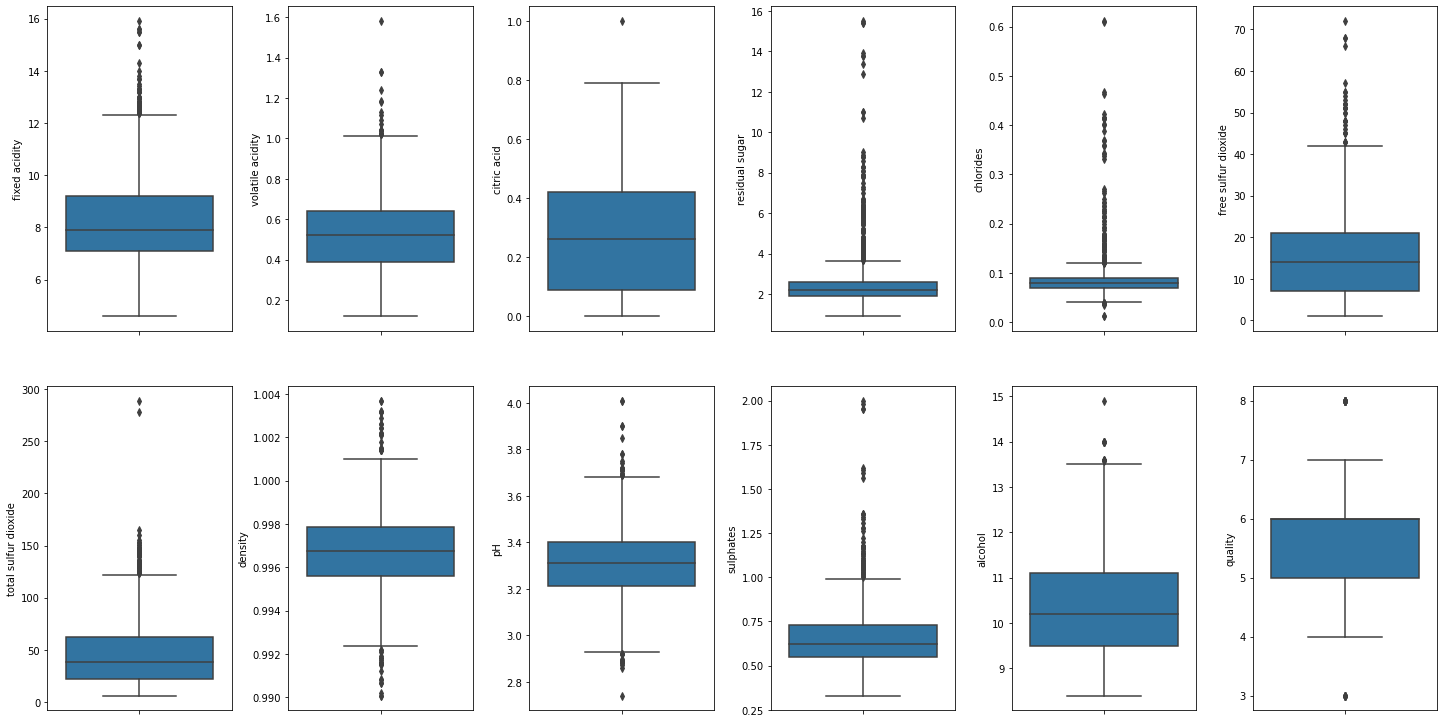

In [6]:
#create Box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col,data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5,w_pad=0.7, h_pad=5.0)

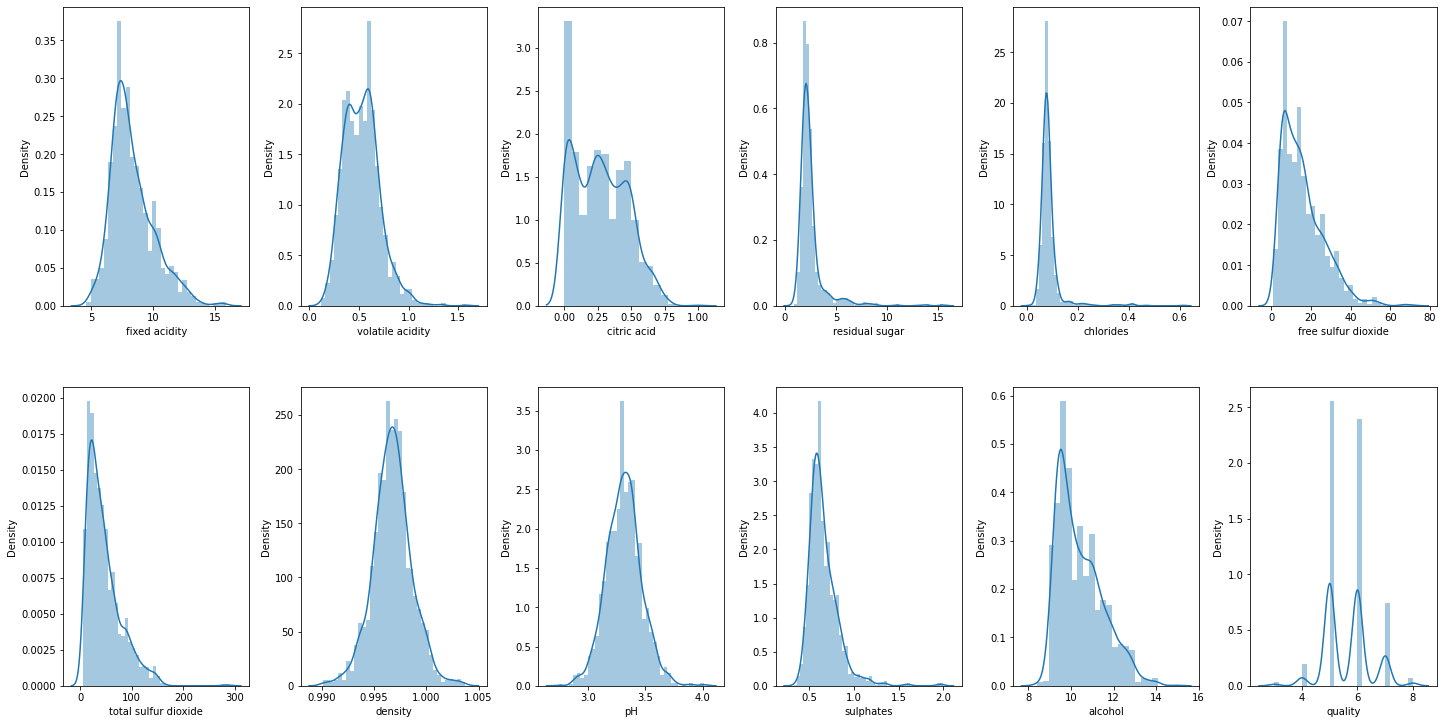

In [7]:
# creat dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5,w_pad=0.7, h_pad=5.0)

In [8]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

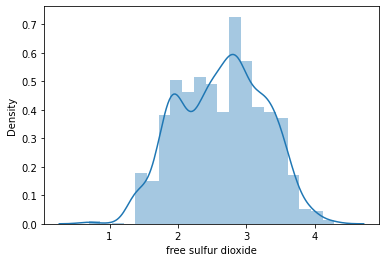

In [9]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='count'>

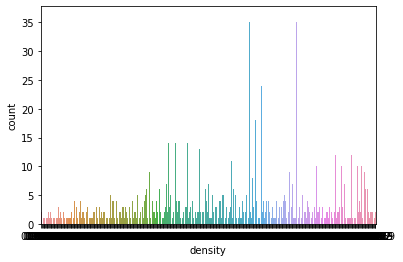

In [10]:
sns.countplot(df['density'])

<AxesSubplot:xlabel='quality', ylabel='count'>

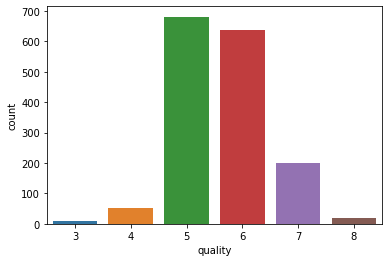

In [11]:
sns.countplot(df['quality'])

### Heatmap for Correlation Matrix of Parameters

<AxesSubplot:>

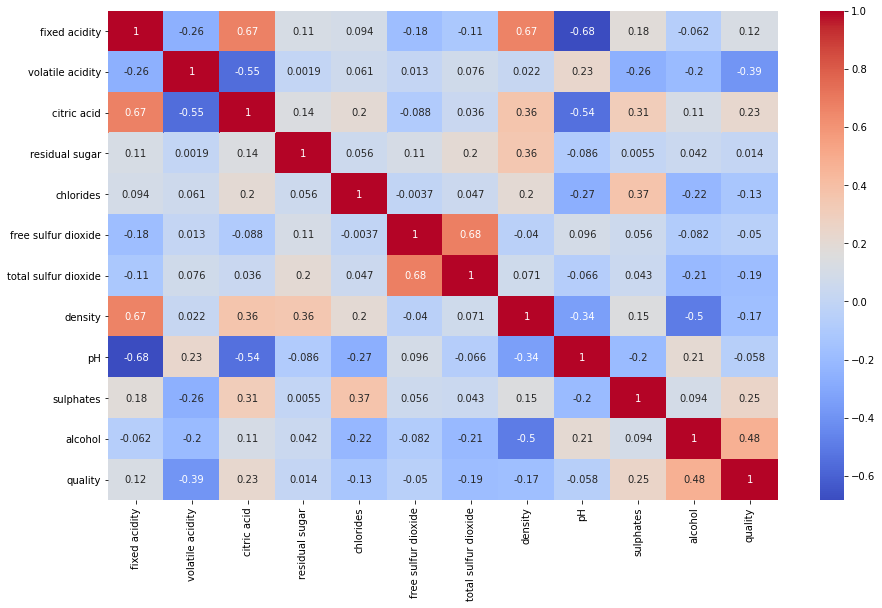

In [12]:
corr =df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True, cmap='coolwarm')

## Input Split

In [13]:
x = df.drop('quality', axis = 1)
y = df['quality']

### Class Imbalancement

In [14]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [16]:
y.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

### Classifier Model Training

In [17]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
    #train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    # cross-validatation
    score = cross_val_score(model, x, y, cv=5)
    print("CV Score:", np.mean(score) * 100)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 49.80430528375734
CV Score: 48.11568353418942


In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 78.47358121330724
CV Score: 73.59260578238113


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy: 84.05088062622309
CV Score: 81.25286919465037


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy: 84.44227005870842
CV Score: 81.93812415270848


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, x, y)

Accuracy: 70.54794520547945
CV Score: 69.5053463533172


In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
classify(model, x, y)

Accuracy: 65.65557729941291
CV Score: 62.334020643238276


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model, x, y)

Accuracy: 78.57142857142857
CV Score: 76.57869299392793


In [25]:
import xgboost as xgb
model =xgb.XGBClassifier()
classify(model, x, y)

[19:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.54011741682974
[19:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:51] WARNING: C:/Users/Administra

In [26]:
# RESULTS : when we are run this Program then we have got diffrent results 

Logistic Regression:          Accuracy: 45.79256360078278  <br># for Break the Line(<br>)
                              CV Score: 48.629101040541315 <br>
Decision Tree:                Accuracy: 78.08219178082192  <br>
                              CV Score: 73.47035639362807  <br>
Random Foreste:               Accuracy: 78.08219178082192  <br>
                              CV Score: 73.47035639362807  <br>
ExtraTreesClassifier:         Accuracy: 85.12720156555773  <br> #This is the best model for good values
                              CV Score: 81.74228571941595  <br>
KNeighborsClassifier:         Accuracy: 70.15655577299414  <br>
                              CV Score: 69.45686556756935  <br>
GradientBoostingClassifier:   Accuracy: 78.27788649706457  <br>
                              CV Score: 76.75002169664793  <br>
MLPClassifier:                Accuracy: 63.992172211350294 <br>
                              CV Score: 62.456539369689935 <br>
xgb:                          Accuracy: 84.54011741682974  <br>
                              CV Score: 80.83683222954754  <br>
                
                


SyntaxError: invalid syntax (<ipython-input-26-4aca08f30f15>, line 3)